In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

/home/rgukt-basar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
df = pd.read_csv("car_sales.csv")

In [4]:
#Read top five values

df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15


In [5]:
# Print dataframe info_data types of each column

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  121 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   155 non-null    float64
 6   Engine size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb weight          155 non-null    float64
 12  Fuel capacity        156 non-null    float64
 13  Fuel efficiency      154 non-null    float64
 14  Latest Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

In [6]:
# Print number of rows and columns

rows, cols = df.shape
print(f"Number of rows and columns: {rows} x {cols}")

Number of rows and columns: 157 x 15


In [7]:
# Drop duplicate rows_if any

df_cleaned = df.drop_duplicates()
df_cleaned


,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,21-Sep-15
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,24-Nov-14
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,25-Jun-15
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,26-Apr-15


In [8]:
# Print number of rows and columns after dropping duplicates

row_drop, col_drop = df_cleaned.shape
print(f"Number of rows after dropping duplicates: {row_drop}")

Number of rows after dropping duplicates: 157


In [9]:
# 6. Print summary statistics for numerical variables

df.describe()

	

,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [10]:
# Print number of missing values in each column

df.isnull().sum()


Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64

In [11]:
# Drop the column with most missing values




column_drop = df.isnull().sum().idxmax()

#  Note : if there is no most missing values all same the first column in the order is droped

print("Before drop df info \n")
df.info()


df_dropcol = df.drop(columns=[column_drop])
print("\nAfter drop df info \n")
df_dropcol.info()

Before drop df info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  121 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   155 non-null    float64
 6   Engine size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb weight          155 non-null    float64
 12  Fuel capacity        156 non-null    float64
 13  Fuel efficiency      154 non-null    float64
 14  Latest Launch        157 non-null    object 
dtypes: float64(11), ob

In [12]:
# Drop the rows with categorical missing values


categorical_cols = df.select_dtypes(include='object').columns
categorical_cols
df_cat_miss = df.dropna(axis=0,subset=categorical_cols, how='any')
# axis specifes drop col or row, row --> 0, col --> 1, default ---> 0
# how specifes drop all or any missing values, default ---> any
#subset specifies the columns where to check the missing values

df_cat_miss


,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,21-Sep-15
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,24-Nov-14
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,25-Jun-15
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,26-Apr-15


In [13]:
# 10. Import the rows with numerical missing values


# Identify numerical columns (dtype == int64 or float64)
numerical_cols = df.select_dtypes(include=['number']).columns

# Select rows where any numerical column has missing values
df_missing_numerical = df[df[numerical_cols].isnull().any(axis=1)]

# Display the filtered DataFrame
print("\nRows with Missing Numerical Values:")
print(df_missing_numerical)


Rows with Missing Numerical Values:
      Manufacturer              Model  Sales in thousands  \
2    Acura          CL                             14.114   
7    BMW            323i                           19.747   
15   Cadillac       Seville                        15.943   
18   Cadillac       Escalade                       14.785   
27   Chevrolet      Impala                        107.995   
33   Chrysler       Town & Country                 53.480   
34   Chrysler       300M                           30.696   
38   Dodge          Intrepid                       88.028   
44   Dodge          Durango                       101.323   
50   Ford           Focus                         175.670   
66   Jaguar         S-Type                         15.467   
72   Lexus          GS400                           3.334   
74   Lexus          LX470                           9.126   
75   Lexus          RX300                          51.238   
78   Lincoln        Navigator                   

In [14]:
# 11. Sort the data w.r.t price_find the details of the most and the least expensive cars


# Drop rows where 'Price' is missing
df = df.dropna(subset=['Price in thousands'])

# convert price from object type to numeric

df['Price in thousands'] = pd.to_numeric(df['Price in thousands'],errors='coerce')

df_sort_price = df.sort_values(by='Price in thousands')

least_expensive_car = df_sort_price.iloc[0]
most_expensive_car = df_sort_price.iloc[-1]

print("Least expensive care details : \n\n", least_expensive_car)
print("\n\nMost expensive car details : \n\n",most_expensive_car)


Least expensive care details : 

 Manufacturer               Chevrolet    
Model                  Metro            
Sales in thousands                21.855
4-year resale value                 5.16
Vehicle type                   Passenger
Price in thousands                 9.235
Engine size                          1.0
Horsepower                          55.0
Wheelbase                           93.1
Width                               62.6
Length                             149.4
Curb weight                        1.895
Fuel capacity                       10.3
Fuel efficiency                     45.0
Latest Launch                  13-Apr-14
Name: 26, dtype: object


Most expensive car details : 

 Manufacturer               Mercedes-Benz
Model                  CL500            
Sales in thousands                 0.954
4-year resale value                  NaN
Vehicle type                   Passenger
Price in thousands                  85.5
Engine size                          5.0
Horsep

In [15]:
# 12. Write a function to find min and max values of any column

def find_min_max_val_col(df,column):
    return df[column].min(), df[column].max()

# Example usage:

min_sales, max_sales = find_min_max_val_col(df,"Sales in thousands")
print(f"Min, max values of sales in thousands col : {min_sales,max_sales} ")

Min, max values of sales in thousands col : (np.float64(0.11), np.float64(540.561)) 


In [16]:
# Call the above function to find min max of horse power, length, fuel efficiency

# Convert multiple columns to numeric using apply
df[['Horsepower', 'Length', 'Fuel efficiency']] = df[['Horsepower', 'Length', 'Fuel efficiency']].apply(pd.to_numeric, errors='coerce')

min_hp, max_hp = find_min_max_val_col(df,"Horsepower")
min_len, max_len = find_min_max_val_col(df,"Length")
min_fuel, max_fuel = find_min_max_val_col(df,"Fuel efficiency")

print(f"Min, max values of horsepower col : {min_hp,max_hp} ")
print(f"Min, max values of len col : {min_len,max_len} ")
print(f"Min, max values of fuel efficiency col : {min_fuel,max_fuel} ")

Min, max values of horsepower col : (np.float64(55.0), np.float64(450.0)) 
Min, max values of len col : (np.float64(149.4), np.float64(224.5)) 
Min, max values of fuel efficiency col : (np.float64(15.0), np.float64(45.0)) 


IndexError: index 4 is out of bounds for axis 0 with size 4

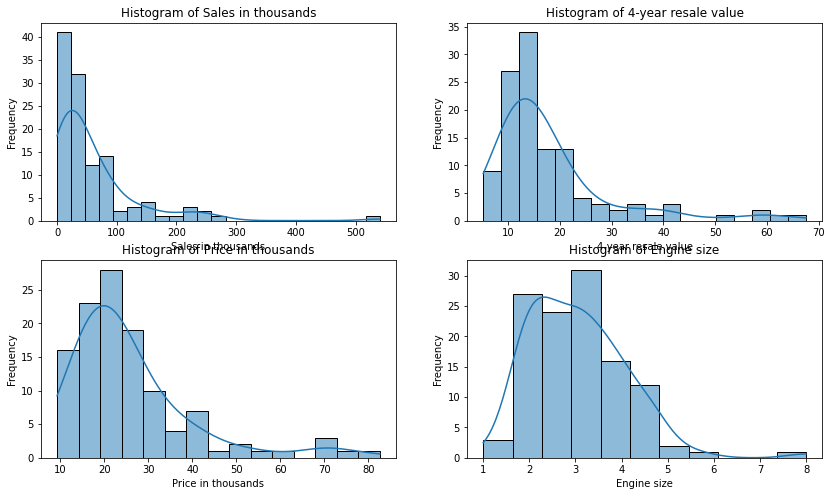

In [17]:
# 14. Plot histogram of continuous numerical variable : price,sales,hoursepower,fuelefficiency



# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns
df_num_cols = df[num_cols].dropna()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))


axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_cols):

    sns.histplot(df_num_cols[col], kde=True, ax=axes[i])

    axes[i].set_title(f"Histogram of {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

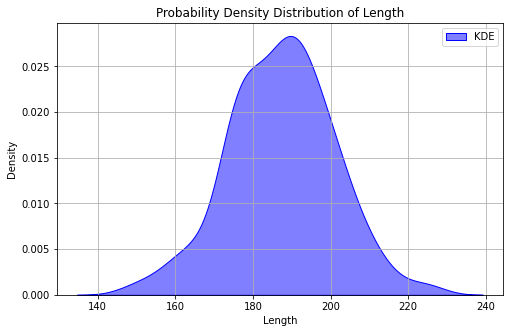

In [18]:
# Probability density distribution of continuous numerical variable-length


df_len = df['Length'].dropna()
plt.figure(figsize=(8, 5))
sns.kdeplot(df_len, fill=True, color="blue",alpha=0.5,
label="KDE")

 # Customize plot
plt.title("Probability Density Distribution of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.grid()
plt.legend()

# Show plot
plt.show()


In [19]:
# Count by category –group by manufacture

df.groupby("Manufacturer").size().reset_index(name="count")

# actully size() returns a series, so reset_index converts to dataframe

,Manufacturer,count
0,Acura,3
1,Audi,3
2,BMW,3
3,Buick,4
4,Cadillac,5
5,Chevrolet,9
6,Chrysler,6
7,Dodge,11
8,Ford,11
9,Honda,5


In [20]:
# 17. Select all numerical variables


num_cols = df.select_dtypes(include=['number']).columns
df_num = df[num_cols]  # Extract numerical columns into a new DataFrame
print(df_num.head())  # Display the first few rows


   Sales in thousands  4-year resale value  Price in thousands  Engine size  \
0              16.919               16.360               21.50          1.8   
1              39.384               19.875               28.40          3.2   
3               8.588               29.725               42.00          3.5   
4              20.397               22.255               23.99          1.8   
5              18.780               23.555               33.95          2.8   

   Horsepower  Wheelbase  Width  Length  Curb weight  Fuel capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   
5       200.0      108.7   76.1   192.0        3.561           18.5   

   Fuel efficiency  
0             28.0  
1             25.0  
3             22.0  
4             

In [21]:
# Print correlation coefficient value of price and sales

df_corr = df[["Price in thousands" , "Sales in thousands"]].dropna()

correlation  = df_corr["Price in thousands"].corr(df["Sales in thousands"])

print("Correlation coeff of price and sales : ", correlation)


Correlation coeff of price and sales :  -0.3047344541294122


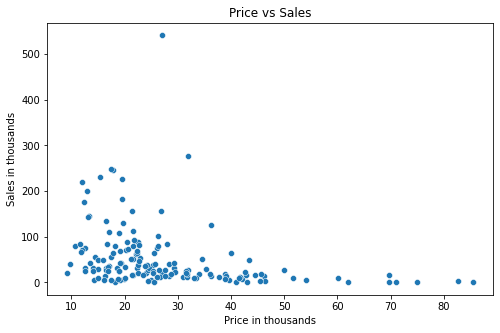

In [22]:
# Plot correlation of price and sales using scatterplot

df.columns = df.columns.str.lower()

price_col = next((col for col in df.columns if "price" in col),None)
sales_col = next((col for col in df.columns if "sales" in col),None)

if price_col and sales_col : 
    plt.figure(figsize=(8,5))
    df_plot = df[[price_col,sales_col]].dropna()
    sns.scatterplot(x=df_plot[price_col], y=df_plot[sales_col])
    plt.title('Price vs Sales')
    plt.xlabel(price_col.capitalize())
    plt.ylabel(sales_col.capitalize())
    plt.show()
else :
    print("No columns with 'price' or 'sales' found in the dataframe")

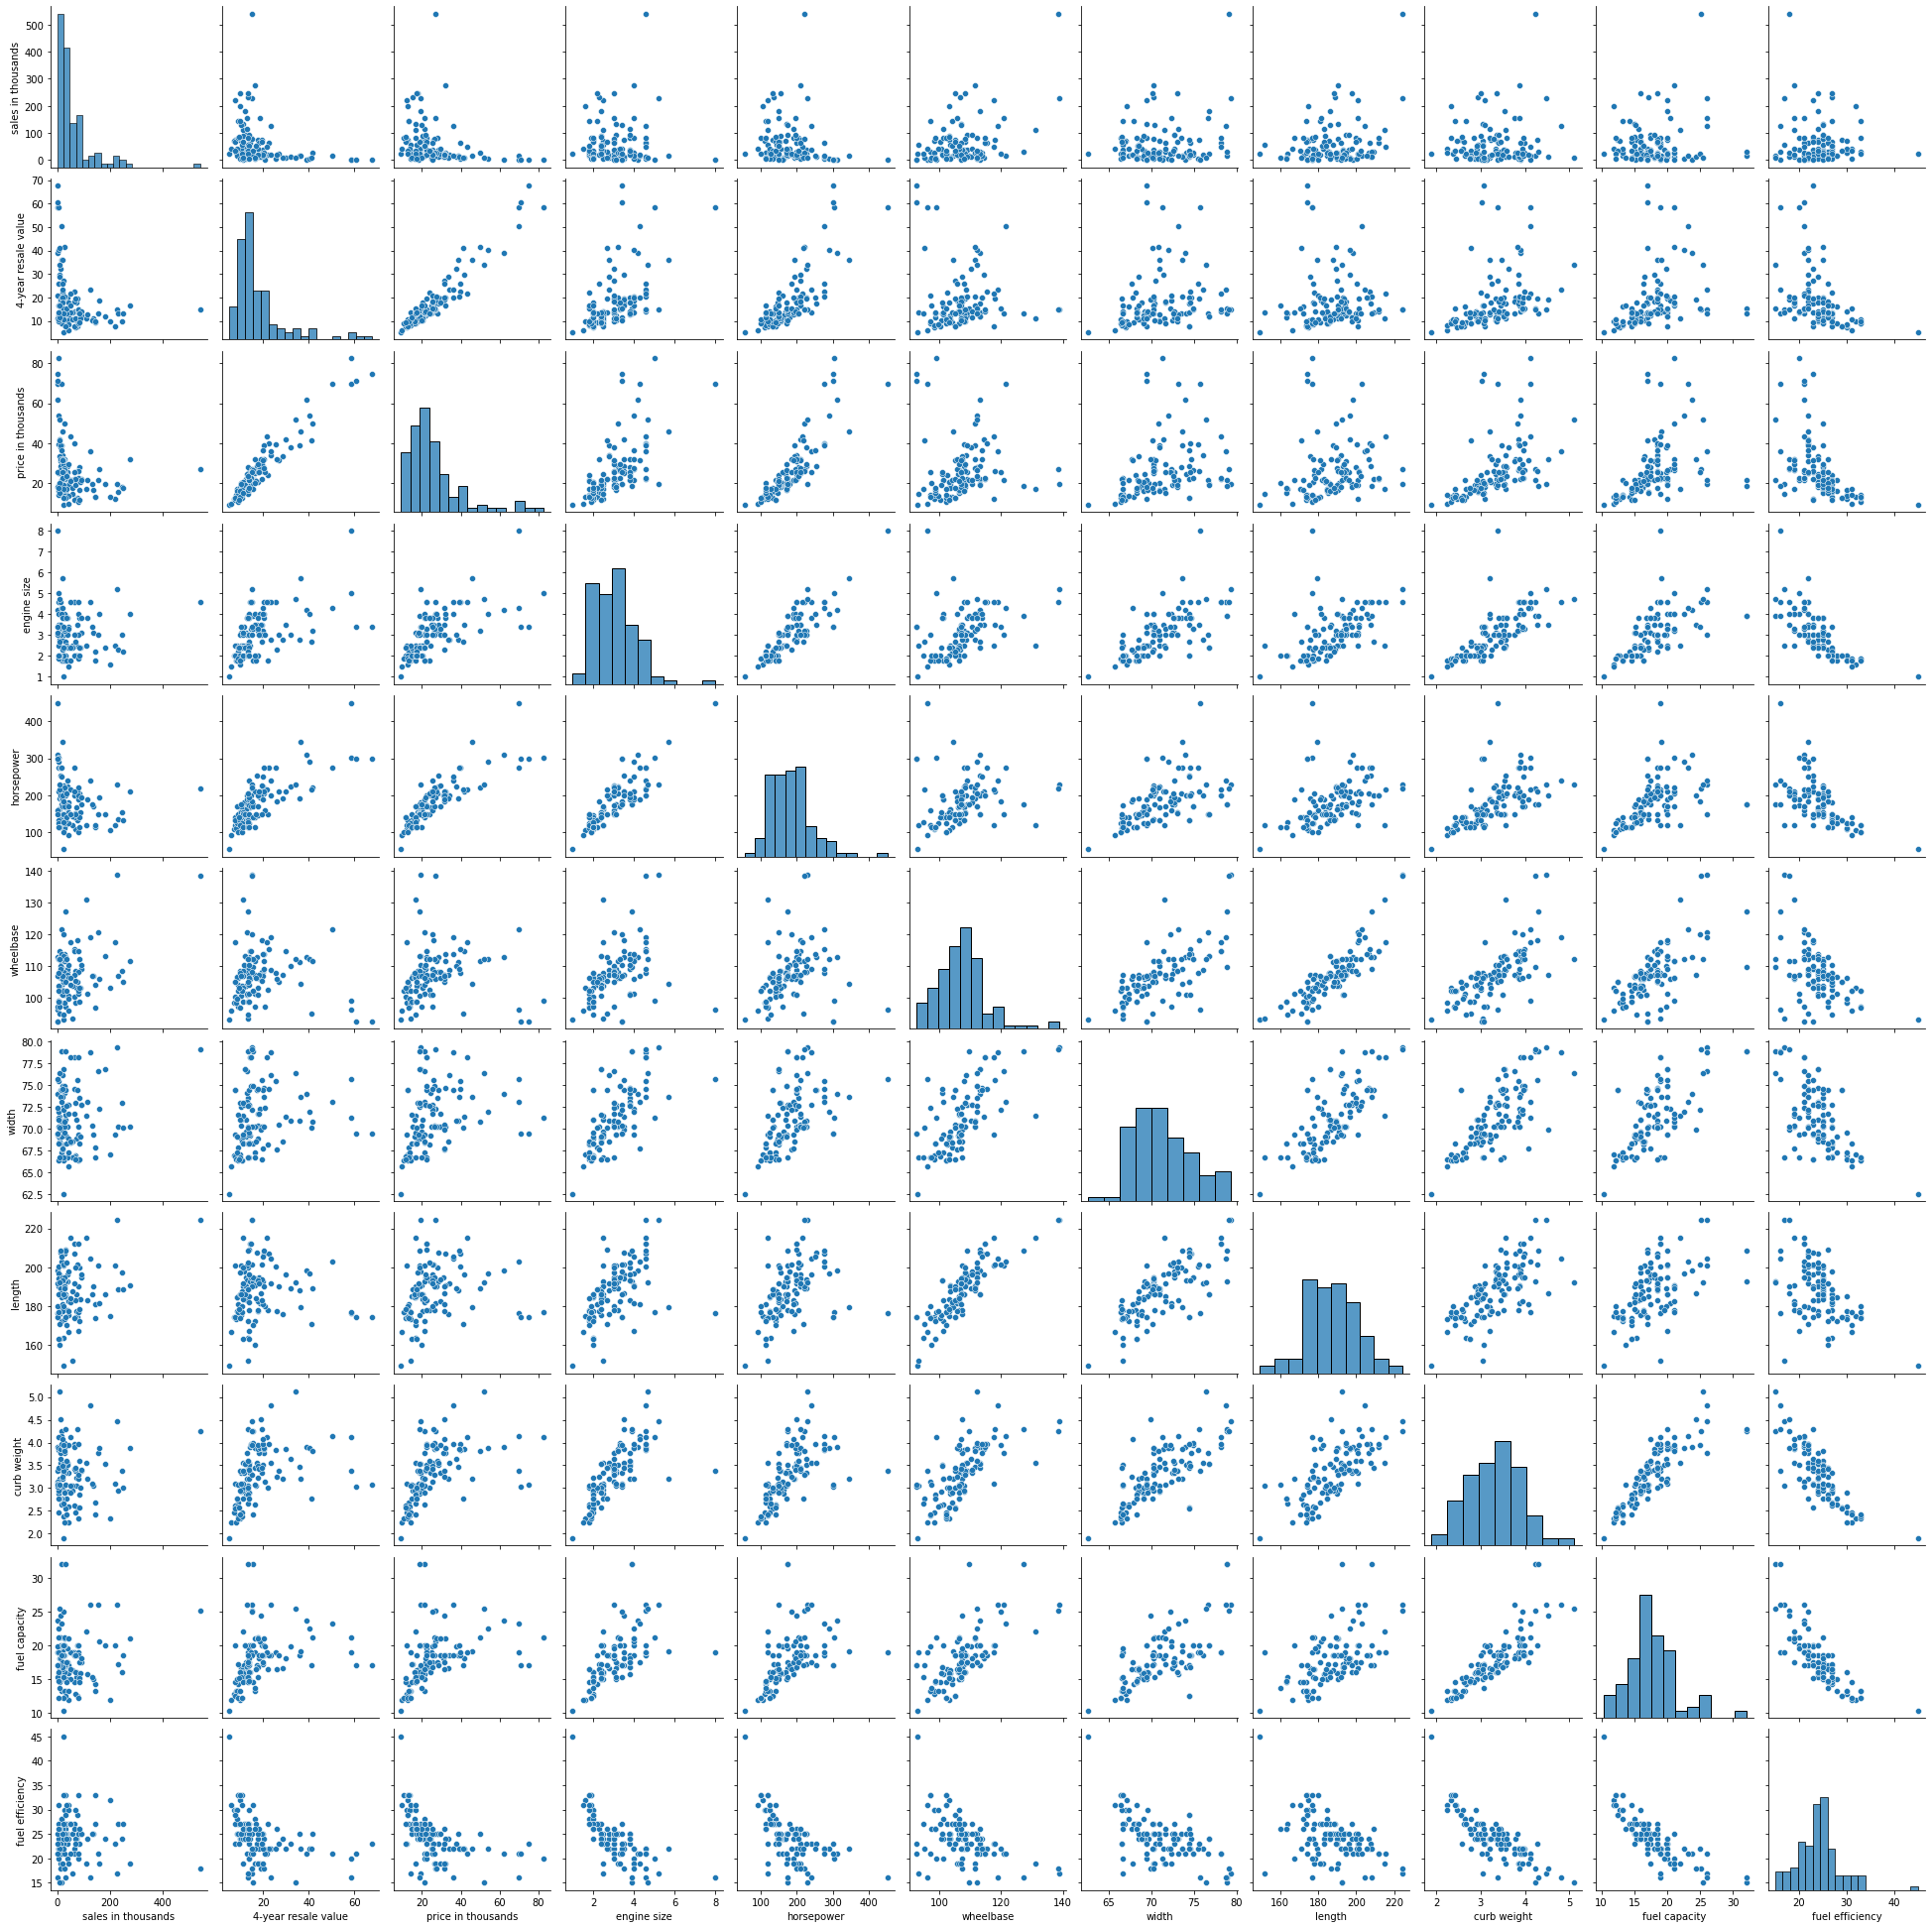

In [23]:
# Pair plot 




num_cols = df.select_dtypes(include='number').columns

# Drop missing values in numerical columns
df_pair = df[num_cols].dropna()



# Create pair plot
sns.pairplot(df_pair)

# Show the plot
plt.show()

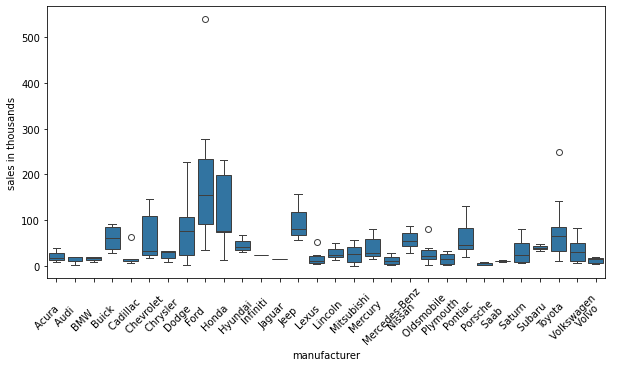

In [24]:
# 21. Boxplot of sales of different manufacturer


plt.figure(figsize=(10,5))
sns.boxplot(x='manufacturer', y='sales in thousands', data=df)
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_5970/4284125055.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
/tmp/ipykernel_5970/4284125055.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
/tmp/ipykernel_5970/4284125055.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
/tmp/ipykernel_5970/4284125055.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels


IndexError: index 4 is out of bounds for axis 0 with size 4

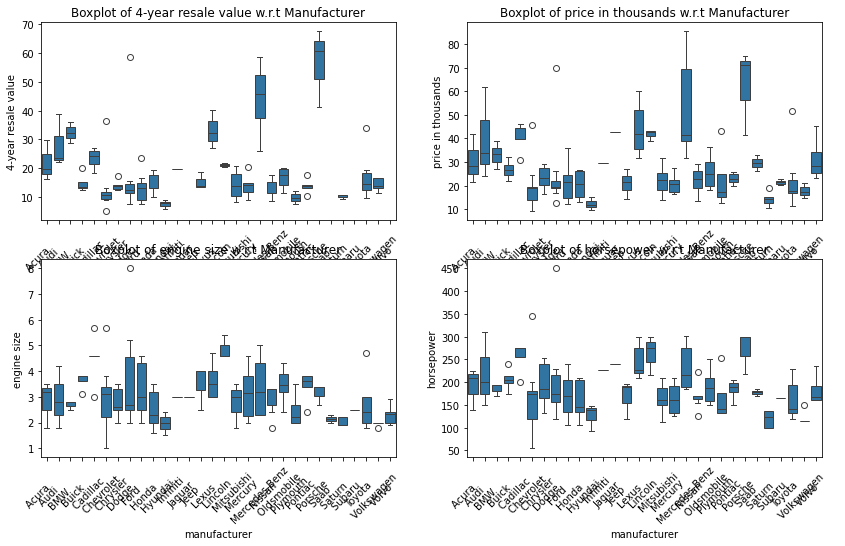

In [25]:
# Boxplot of other numerical variables w.r.t manufacture


# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Exclude 'Sales in Thousands' column (Fixing spelling mistake)
num_cols = [col for col in num_cols if "sales in thousands" not in col.lower()]

# Create subplots (Adjust number of rows dynamically)
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 2x2 grid

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through numerical columns and plot boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x="manufacturer", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} w.r.t Manufacturer")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels

plt.tight_layout()
plt.show()    


In [27]:
# 23. Divide the data into input and output y=sales in thousand, x=all other variables

x = df.drop(columns=["sales in thousands"])
y = df["sales in thousands"]

In [28]:
# Convert 'latest launch' to datetime
df['latest launch'] = pd.to_datetime(df['latest launch'], format='%d-%b-%y', errors='coerce')


# Specify categorical columns to keep as object
categorical_cols = ['model', 'manufacturer', 'vehicle type']

# Convert all other columns to numeric (except the specified categorical ones)
for col in df.columns:
    if col not in categorical_cols + ['latest launch']:  # Exclude categorical & date columns
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to number, handle errors

# Verify new data types
print(df.dtypes)

manufacturer                   object
model                          object
sales in thousands            float64
4-year resale value           float64
vehicle type                   object
price in thousands            float64
engine size                   float64
horsepower                    float64
wheelbase                     float64
width                         float64
length                        float64
curb weight                   float64
fuel capacity                 float64
fuel efficiency               float64
latest launch          datetime64[ns]
dtype: object


In [29]:
# 24. Encode other categorical variables using label encoder


cat_cols = x.select_dtypes(include='object').columns


encoder = LabelEncoder()

for col in cat_cols :
    x[col] = encoder.fit_transform(x[col])    


In [30]:
# 25. Encode categorical variable vehicle type using one-hot encoder

df = pd.get_dummies(df, columns=['vehicle type'],
prefix='vehicle', drop_first=True)
df

,manufacturer,model,sales in thousands,4-year resale value,price in thousands,engine size,horsepower,wheelbase,width,length,curb weight,fuel capacity,fuel efficiency,latest launch,vehicle_Passenger
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2014-02-02,True
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2015-03-06,True
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2015-10-03,True
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2015-08-10,True
5,Audi,A6,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2015-09-08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2015-09-21,True
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2014-11-24,True
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2015-06-25,True
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2015-04-26,True


In [31]:
# 26.Split the data set into train and test set 70% train set 10% test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)


In [32]:
# 27. Apply feature scaling on numerical variables

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Drop missing values (or use imputation)
df_cleaned = df.dropna(subset=num_cols)

# Initialize scalers
minmax_scaler = MinMaxScaler()  # Normalization (0 to 1)
standard_scaler = StandardScaler()  # Standardization (mean=0, std=1)

# Apply Min-Max Scaling (Normalization)
df_minmax = df_cleaned.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

# Apply Standardization (Z-score Scaling)
df_standardized = df_cleaned.copy()
df_standardized[num_cols] = standard_scaler.fit_transform(df_standardized[num_cols])

# Display first few rows after scaling
print("Min-Max Scaled Data:\n", df_minmax.head())
print("\nStandardized Data:\n", df_standardized.head())

Min-Max Scaled Data:
     manufacturer              model  sales in thousands  4-year resale value  \
0  Acura          Integra                      0.031102             0.179516   
1  Acura          TL                           0.072669             0.235855   
3  Acura          RL                           0.015687             0.393733   
4  Audi           A4                           0.037537             0.274002   
5  Audi           A6                           0.034545             0.294839   

   price in thousands  engine size  horsepower  wheelbase     width    length  \
0            0.167178     0.114286    0.215190   0.186551  0.281437  0.306258   
1            0.261228     0.314286    0.430380   0.336226  0.461078  0.579228   
3            0.446603     0.357143    0.392405   0.477223  0.526946  0.628495   
4            0.201118     0.114286    0.240506   0.216920  0.335329  0.380826   
5            0.336877     0.257143    0.367089   0.349241  0.808383  0.567244   

   curb we